Problem Statement: Customer Segmentation Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


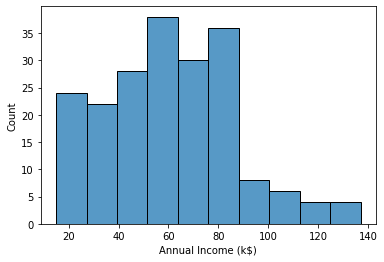

In [5]:
sns.histplot(data['Annual Income (k$)'])

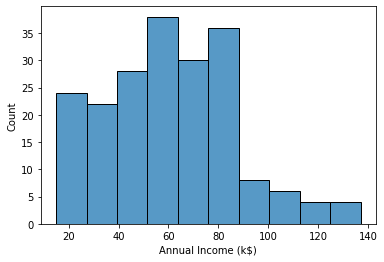

In [6]:
sns.histplot(data['Annual Income (k$)'])

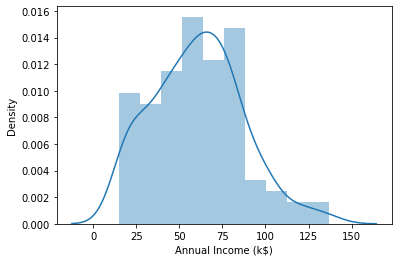

In [7]:
sns.distplot(data['Annual Income (k$)'])

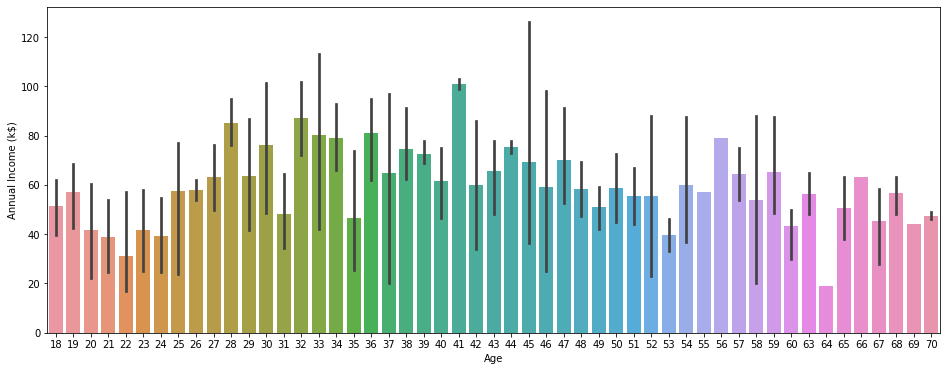

In [8]:
plt.figure(figsize=(16,6))
sns.barplot(data['Age'],data['Annual Income (k$)'])

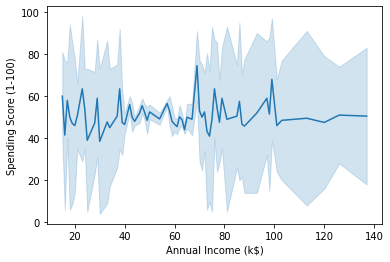

In [9]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'])

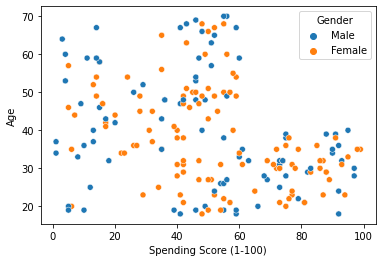

In [10]:
sns.scatterplot(data['Spending Score (1-100)'], data['Age'], hue = data['Gender'])


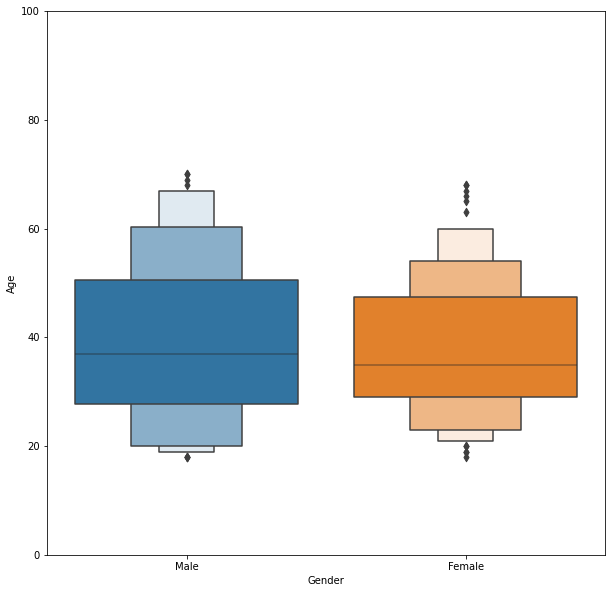

In [11]:
tem = pd.concat([data['Age'], data['Gender']], axis=1)
f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Gender', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

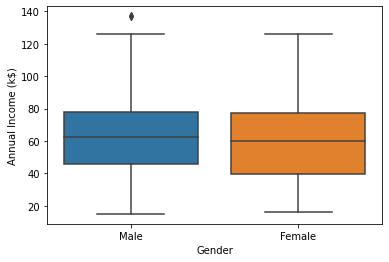

In [12]:
sns.boxplot(x=data['Gender'],y=data['Annual Income (k$)'])

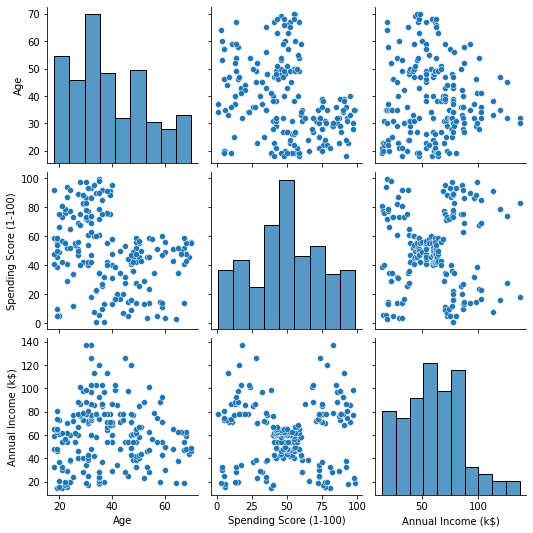

In [13]:
sns.pairplot(data=data[["Age", "Gender","Spending Score (1-100)","Annual Income (k$)"]])


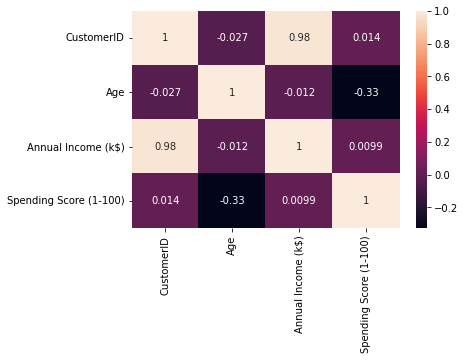

In [14]:
sns.heatmap(data.corr(),annot=True)

In [15]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
data.info
data.shape

(200, 5)

In [17]:
data.isnull().any() 

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [18]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


{'whiskers': [<matplotlib.lines.Line2D at 0x7f16d98f42d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f16d98f4d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f16d98efc90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f16d98fa850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f16d98fad90>],
 'means': []}

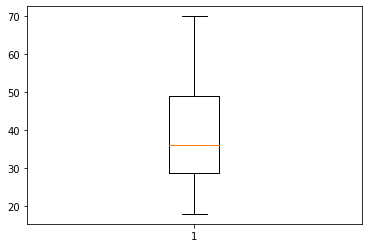

In [19]:
for index in data:
    if data[index].dtype=='int64':
        a=data[index].quantile(0.25)
        b=data[index].quantile(0.75)
        c=b-a
        upper=b+1.5*c
        lower=a-1.5*c
        data[index]=np.where(data[index] >upper, upper, data[index])
        data[index]=np.where(data[index] <lower, lower, data[index])
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f16d985b790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f16d9862250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f16d985b210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f16d9862d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f16d9869290>],
 'means': []}

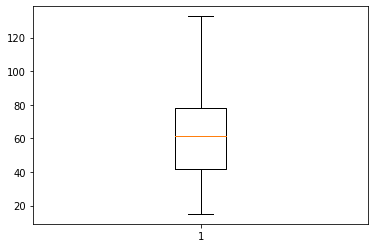

In [20]:
plt.boxplot(data['Annual Income (k$)'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f16d984c110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f16d984cb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f16d9845b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f16d9855690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f16d9855bd0>],
 'means': []}

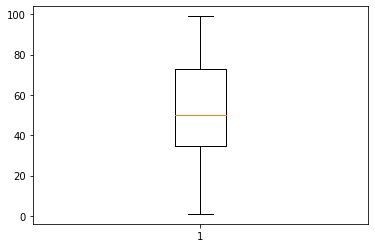

In [21]:
plt.boxplot(data['Spending Score (1-100)'])

In [22]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data['Gender'] = label_en.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

In [28]:
from sklearn.cluster import KMeans
k_means = KMeans()
res = k_means.fit_predict(data_scaled)
res

array([3, 3, 1, 1, 1, 1, 7, 1, 5, 1, 5, 1, 7, 1, 2, 3, 1, 3, 5, 1, 3, 3,
       7, 3, 7, 3, 7, 3, 7, 1, 5, 1, 5, 3, 7, 1, 7, 1, 7, 1, 7, 3, 5, 1,
       7, 1, 7, 1, 1, 1, 7, 3, 1, 5, 7, 5, 7, 5, 1, 5, 5, 3, 7, 7, 5, 3,
       7, 7, 3, 1, 5, 7, 7, 7, 5, 3, 7, 3, 1, 7, 5, 3, 5, 7, 1, 5, 7, 1,
       1, 7, 7, 3, 5, 7, 1, 3, 7, 1, 5, 3, 1, 7, 5, 3, 5, 1, 7, 5, 5, 5,
       5, 1, 7, 3, 1, 1, 7, 7, 7, 7, 3, 7, 6, 0, 1, 6, 2, 0, 5, 0, 2, 0,
       1, 6, 2, 6, 4, 0, 2, 6, 4, 0, 1, 6, 2, 0, 2, 6, 4, 0, 2, 0, 4, 6,
       4, 6, 2, 6, 2, 6, 7, 6, 2, 6, 2, 6, 2, 6, 4, 0, 2, 0, 2, 0, 4, 6,
       2, 0, 2, 0, 4, 6, 2, 6, 4, 0, 4, 0, 4, 6, 4, 6, 2, 6, 4, 6, 4, 0,
       2, 0], dtype=int32)

In [29]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [31]:
data1['kclus']  = pd.Series(res)
data1.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,3
1,1.0,0.057692,0.000000,0.816327,3
2,0.0,0.038462,0.008493,0.051020,1
3,0.0,0.096154,0.008493,0.775510,1
4,0.0,0.250000,0.016985,0.397959,1


In [32]:
data1['kclus'].unique()

array([3, 1, 7, 5, 2, 6, 0, 4], dtype=int32)

In [33]:
data1['kclus'].value_counts()


7    39
1    37
5    26
3    24
6    22
2    20
0    18
4    14
Name: kclus, dtype: int64

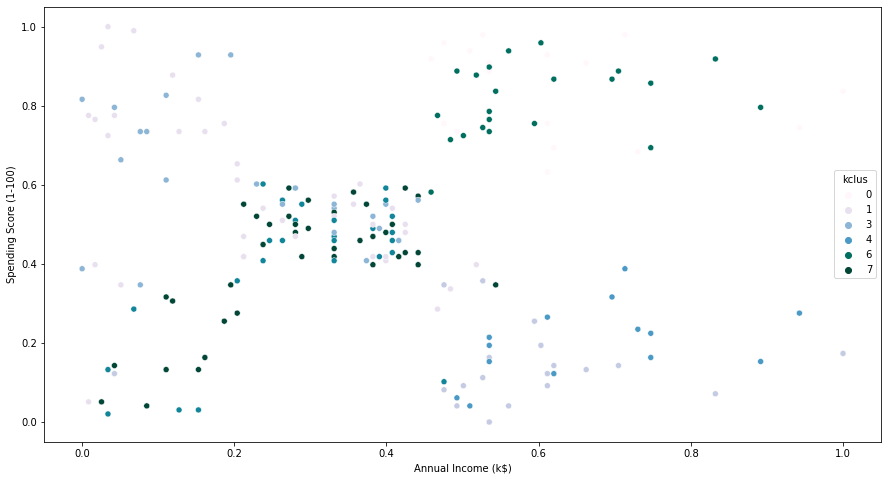

In [34]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [35]:
H = data1.iloc[:,0:4]
H.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [36]:
S = data1.iloc[:,4:]
S.head()

,kclus
0,3
1,3
2,1
3,1
4,1


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(H,S,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [39]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [40]:
y_train.head()

,kclus
116,7
67,7
78,1
42,5
17,3


In [41]:
y_test.head()

,kclus
58,1
40,7
34,7
102,5
184,4


In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [43]:
pred_test = lin_reg.predict(x_test)
pred_test[0:5]

array([[3.72420017],
       [7.37713314],
       [5.79320746],
       [5.44051575],
       [4.5839079 ]])

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mean_se = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mean_se)
r_mse = np.sqrt(mean_se)
print("The Root mean squared error is: ", r_mse)
mean_ae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mean_ae)
accurate = lin_reg.score(x_test,y_test)
print("The accuracy is: ", accurate)

The Mean squared error is:  3.5055161184507058
The Root mean squared error is:  1.872302357647051
The Mean absolute error is:  1.5936220387704332
The accuracy is:  0.42647436709586717
